# Problem Set 1: Linear Regression

If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell double click on its content. To change cell type, choose "Text" or "Code" in the drop-down menu above. Here are some useful resources for [Markdown guide](https://www.markdownguide.org/basic-syntax/) and [LaTeX tutorial](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes) if you are not familiar with the basic syntax.

If certain output is given for some cells, that means that you are expected to get similar results.

We need to submit only a notebook for ps1 submission.

Total: 185 points.

In [1]:
!pip3 install matplotlib==3.4


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.13 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this erro

### 1. Numpy Tutorial
**1\.1 [5pt]**
Modify the cell below to return a 5x5 matrix of ones. Put some code there and press `Ctrl+Enter` to execute contents of the cell. You should see something like the output above. [[1]](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html#arrays-creation) [[2]](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html#routines-array-creation)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(np.ones((5, 5)))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


**1.2 [5pt]**
Vectorizing your code is very important to get results in a reasonable time. Let A be a 10x10 matrix and x be a 10-element column vector. Your friend writes the following code. How would you vectorize this code to run without any for loops? Compare execution speed for different values of `n` with [`%timeit`](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In [3]:
n = 10
def compute_something(A, x):
    v = np.zeros((n, 1))
    for i in range(n):
        for j in range(n):
            v[i] += A[i, j] * x[j]
    return v

A = np.random.rand(n, n)
x = np.random.rand(n, 1)
print(compute_something(A, x))

[[2.20502302]
 [2.7891146 ]
 [2.78465036]
 [2.70945479]
 [3.89935823]
 [3.15614662]
 [2.4703398 ]
 [2.90492732]
 [2.97957902]
 [3.60980876]]


In [4]:
def vectorized(A, x):
    return np.dot(A, x)

print(vectorized(A, x))
assert np.max(abs(vectorized(A, x) - compute_something(A, x))) < 1e-3

[[2.20502302]
 [2.7891146 ]
 [2.78465036]
 [2.70945479]
 [3.89935823]
 [3.15614662]
 [2.4703398 ]
 [2.90492732]
 [2.97957902]
 [3.60980876]]


In [5]:
for n in [5, 10, 100, 500]:
    A = np.random.rand(n, n)
    x = np.random.rand(n, 1)
    %timeit -n 5 compute_something(A, x)
    %timeit -n 5 vectorized(A, x)
    print('---')

61.7 μs ± 3.95 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
The slowest run took 10.02 times longer than the fastest. This could mean that an intermediate result is being cached.
3.75 μs ± 2.66 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
---
194 μs ± 8.8 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
The slowest run took 8.78 times longer than the fastest. This could mean that an intermediate result is being cached.
8.37 μs ± 5.67 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
---
10.1 ms ± 973 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
The slowest run took 29.31 times longer than the fastest. This could mean that an intermediate result is being cached.
4.8 μs ± 9.31 μs per loop (mean ± std. dev. of 7 runs, 5 loops each)
---
235 ms ± 6.03 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
The slowest run took 27.81 times longer than the fastest. This could mean that an intermediate result is being cached.
49.1 μs ± 95.1 μs per loop (

### 2. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. The file ex1data.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

**2.1 [10pt]** Get a plot similar to below
: [[1]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) [[2]](https://matplotlib.org/api/pyplot_api.html?highlight=xlim#matplotlib.pyplot.xlim) [[3]](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20xlabel#matplotlib.pyplot.xlabel)

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.

(97, 1) (97, 1) 97
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]
 [8.3829]
 [7.4764]
 [8.5781]
 [6.4862]
 [5.0546]] 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]
 [11.886 ]
 [ 4.3483]
 [12.    ]
 [ 6.5987]
 [ 3.8166]]


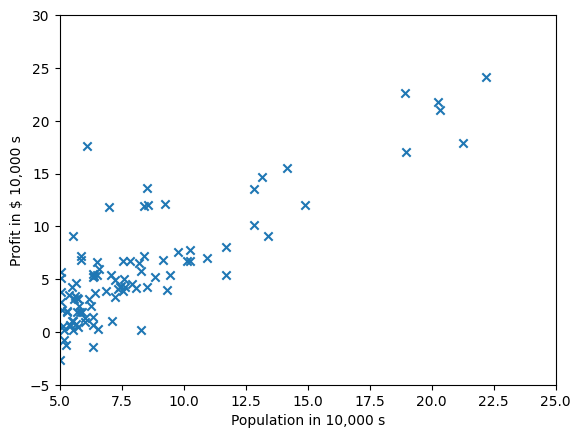

In [6]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0, np.newaxis], data[:, 1, np.newaxis]
n = data.shape[0] # Num of Row
print(X.shape, y.shape, n)
print(X[:10], '\n', y[:10])

import matplotlib.pyplot as plt
plt.scatter(X, y, marker="x")
plt.xlim(5, 25)
plt.xlabel("Population in 10,000 s")
plt.ylim(-5, 30)
plt.ylabel("Profit in $ 10,000 s")

plt.show()

**2.2** Gradient Descent

In this part, you will fit the linear regression parameter $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function
$$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} \big(h(x^{(i)}; \theta) - y^{(i)}\big)^2$$
where the hypothesis $h(x;\theta)$ is given by the linear model ($x'$ has an additional fake feature always equal to '`1`')
$$ h(x;\theta) = \theta^T x' = \theta_0 + \theta_1 x$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the gradient descent
algorithm. In batch gradient descent algorithm, each iteration performs the update.

$$ \theta_j^{(k+1)} = \theta_j^{(k)} - \eta \frac{1}{m} \sum_i \big(h(x^{(i)}; \theta) - y^{(i)}\big) x^{(i)}_j $$
With each step of gradient descent, your parameter $\theta_j$ come closer to the optimal values
that will achieve the lowest cost J(θ).


**2.2.1** **[5pt]** Where does this update rule comes from?

The update rule of gradient descent is that get the gradent of  of the $\theta_{j}$ and multiply it with the learning rate $\eta$ then subtract from the each steps's $\theta_{j}$. 

**2.2.2** **[30pt]** Cost Implementation

As you perform gradient descent to learn to minimize the cost function, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In the following lines, we add another dimension to our data to accommodate the intercept term and compute the prediction and the loss. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. In order to get $x'$ [add a column](https://docs.scipy.org/doc/numpy/reference/generated/numpy.insert.html) of ones to the data matrix `X`.

You should expect to see a cost of approximately 32.

In [21]:
# assertions below are true only for this
# specific case and are given to ease debugging!

def add_column(X):
    assert len(X.shape) == 2 and X.shape[1] == 1
    X = np.insert(X, 0, 1, axis=1)
    return X

def predict(X, theta):
    """ Computes h(x; theta) """
    assert len(X.shape) == 2 and X.shape[1] == 1
    assert theta.shape == (2, 1)
    X_prime = add_column(X)
    pred = X_prime @ theta

    return pred

def loss(X, y, theta): # this is SSD, basically
    assert X.shape == (n, 1)
    assert y.shape == (n, 1)
    assert theta.shape == (2, 1)

    X_prime = add_column(X)
    assert X_prime.shape == (n, 2)

    hypothesis = predict(X, theta)
    loss = (np.dot((hypothesis - y).T, (hypothesis - y)) / (2 * X_prime.shape[0]))[0]
    return loss

theta_init = np.zeros((2, 1))
print(loss(X, y, theta_init))

[32.07273388]


In [8]:
theta_init = np.ones((2, 1))
print(theta_init)
x = predict(X, theta_init)
print(x)
print(x.shape)

[[1.]
 [1.]]
[[ 7.1101]
 [ 6.5277]
 [ 9.5186]
 [ 8.0032]
 [ 6.8598]
 [ 9.3829]
 [ 8.4764]
 [ 9.5781]
 [ 7.4862]
 [ 6.0546]
 [ 6.7107]
 [15.164 ]
 [ 6.734 ]
 [ 9.4084]
 [ 6.6407]
 [ 6.3794]
 [ 7.3654]
 [ 6.1301]
 [ 7.4296]
 [ 8.0708]
 [ 7.1891]
 [21.27  ]
 [ 6.4901]
 [ 7.3261]
 [ 6.5649]
 [19.945 ]
 [13.828 ]
 [11.957 ]
 [14.176 ]
 [23.203 ]
 [ 6.2524]
 [ 7.5894]
 [10.2482]
 [ 6.8918]
 [ 9.2111]
 [ 8.9334]
 [ 9.0959]
 [ 6.6063]
 [13.836 ]
 [ 7.3534]
 [ 6.4069]
 [ 7.8825]
 [12.708 ]
 [ 6.7737]
 [ 8.8247]
 [ 8.0931]
 [ 6.0702]
 [ 6.8014]
 [12.7   ]
 [ 6.5416]
 [ 8.5402]
 [ 6.3077]
 [ 8.4239]
 [ 8.6031]
 [ 7.3328]
 [ 7.3589]
 [ 7.2742]
 [ 6.6397]
 [10.3102]
 [10.4536]
 [ 9.8254]
 [ 6.1793]
 [22.279 ]
 [15.908 ]
 [19.959 ]
 [ 8.2182]
 [ 9.2951]
 [11.236 ]
 [ 6.4994]
 [21.341 ]
 [11.136 ]
 [ 8.3345]
 [ 7.0062]
 [ 8.2259]
 [ 6.0269]
 [ 7.5479]
 [ 8.5386]
 [ 6.0365]
 [11.274 ]
 [ 6.1077]
 [ 6.7292]
 [ 6.1884]
 [ 7.3557]
 [10.7687]
 [ 7.5159]
 [ 9.5172]
 [10.1802]
 [ 7.002 ]
 [ 6.5204]
 [ 6.059

**2.2.3** **[40pt]** GD Implementation

Next, you will implement gradient descent. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost is parameterized by the vector $\theta$ not X and y. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of  and check that it is decreasing with each step. Your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.  Another way of making sure your gradient estimate is correct is to check it againts a [finite difference](https://en.wikipedia.org/wiki/Finite_difference) approximation.

We also initialize the initial parameters to 0 and the learning rate alpha to `0.01`.

max grad comp error 2.822587286743783e-05
estimated theta value [-3.63029144  1.16636235]
resulting loss [4.48338826]


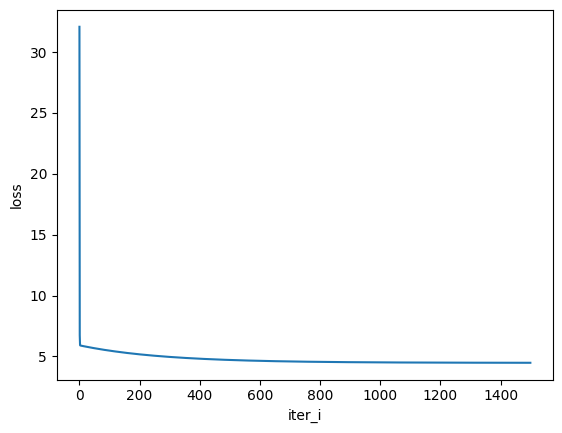

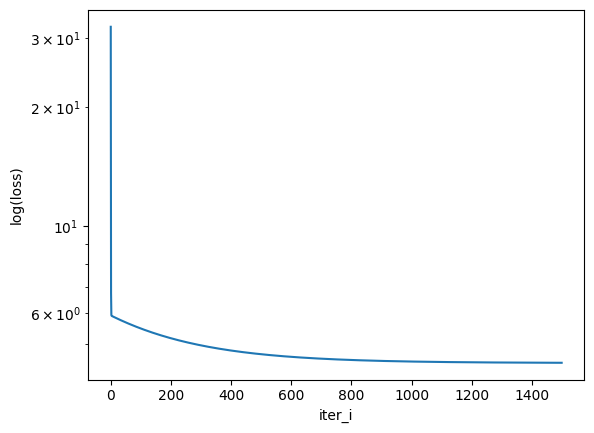

In [22]:
import scipy.optimize
from functools import partial

def loss_gradient(X, y, theta):
    X_prime = add_column(X)
    hypothesis = predict(X, theta)
    loss_grad = loss_grad = X_prime.T @ (hypothesis - y) / X_prime.shape[0] # divide by the number of n to get the average difference

    return loss_grad

assert loss_gradient(X, y, theta_init).shape == (2, 1)

def finite_diff_grad_check(f, grad, points, eps=1e-10):
    errs = []
    for point in points:
        point_errs = []
        grad_func_val = grad(point)
        for dim_i in range(point.shape[0]):
            diff_v = np.zeros_like(point)
            diff_v[dim_i] = eps
            dim_grad = (f(point+diff_v) - f(point-diff_v))/(2*eps)
            point_errs.append(abs(dim_grad - grad_func_val[dim_i]))
        errs.append(point_errs)
    return errs

test_points = [np.random.rand(2, 1) for _ in range(10)]
finite_diff_errs = finite_diff_grad_check(
    partial(loss, X, y), partial(loss_gradient, X, y), test_points
)

print('max grad comp error', np.max(finite_diff_errs))
assert np.max(finite_diff_errs) < 1e-3, "grad computation error is too large"

def run_gd(loss, loss_gradient, X, y, theta_init, lr=0.01, n_iter=1500):
    theta_current = theta_init.copy()
    loss_values = []
    theta_values = []

    for i in range(n_iter):
        loss_value = loss(X, y, theta_current)
        loss_gradient_value = loss_gradient(X, y, theta_current)
        theta_current = theta_current - lr * loss_gradient_value
        loss_values.append(loss_value)
        theta_values.append(theta_current)

    return theta_current, loss_values, theta_values

result = run_gd(loss, loss_gradient, X, y, theta_init)
theta_est, loss_values, theta_values = result

print('estimated theta value', theta_est.ravel())
print('resulting loss', loss(X, y, theta_est))
plt.ylabel('loss')
plt.xlabel('iter_i')
plt.plot(loss_values)
plt.show()

plt.ylabel('log(loss)')
plt.xlabel('iter_i')
plt.semilogy(loss_values)
plt.show()

**2.2.4** **[10pt]** After you are finished, use your final parameters to plot the linear fit. The result should look something like on the figure below. Use the `predict()` function.

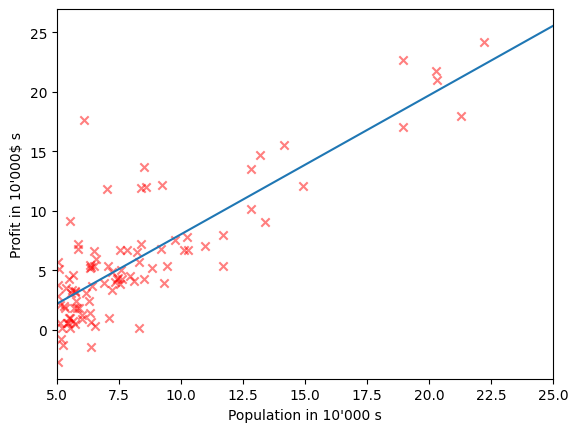

In [34]:
plt.scatter(X, y, marker='x', color='r', alpha=0.5)
x_start, x_end = 5, 25
x = np.linspace(x_start, x_end).reshape(-1, 1) # get the 50 points in line space from x_start to x_end 
prediction = predict(x, theta_est)
plt.plot(x, prediction)
plt.xlim(x_start, x_end)
plt.xlabel('Population in 10\'000 s')
plt.ylabel('Profit in 10\'000$ s')
plt.show()

Now use your final values for $\theta$ and the `predict()` function to make predictions on profits in areas of 35,000 and 70,000 people.

In [43]:
area1, area2 = 35000, 70000
areas = np.array([area1, area2]).reshape(-1, 1)
prediction = predict(areas, theta_est)
print(prediction)

[[40819.05197031]
 [81641.73423205]]


In [ ]:
raise NotImplementedError("Predict values given inputs")


[[ 40707.71769521]
 [ 81418.93236663]]


To understand the cost function better, you will now plot the cost over a 2-dimensional grid of values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

(100, 100) (100, 100) (100, 100)


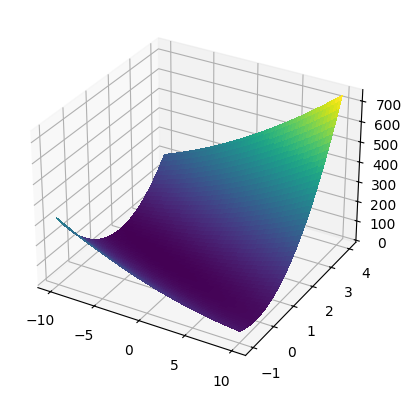

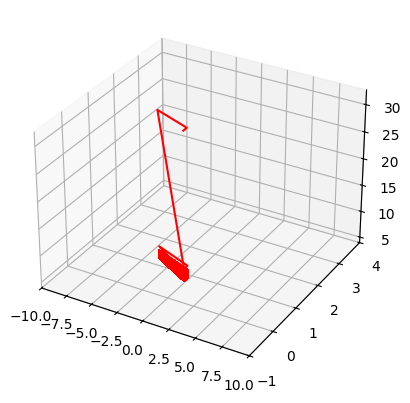

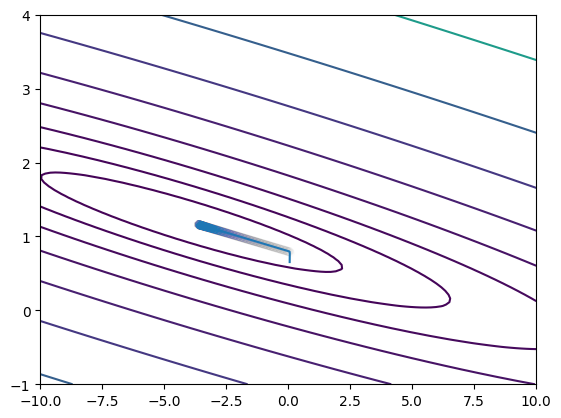

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
limits = [(-10, 10), (-1, 4)]
space = [np.linspace(*limit, 100) for limit in limits]
theta_1_grid, theta_2_grid = np.meshgrid(*space)
theta_meshgrid = np.vstack([theta_1_grid.ravel(), theta_2_grid.ravel()])
loss_test_vals_flat = (((add_column(X) @ theta_meshgrid - y)**2).mean(axis=0)/2)
loss_test_vals_grid = loss_test_vals_flat.reshape(theta_1_grid.shape)
print(theta_1_grid.shape, theta_2_grid.shape, loss_test_vals_grid.shape)

plt.figure().add_subplot(projection='3d').plot_surface(theta_1_grid, theta_2_grid,
                                      loss_test_vals_grid, cmap=cm.viridis,
                                      linewidth=0, antialiased=False)
xs, ys = np.hstack(theta_values).tolist()
zs = np.array(loss_values)
plt.figure().add_subplot(projection='3d').plot(xs, ys, zs, c='r')
plt.xlim(*limits[0])
plt.ylim(*limits[1])
plt.show()

plt.contour(theta_1_grid, theta_2_grid, loss_test_vals_grid, levels=np.logspace(-2, 3, 20))
plt.plot(xs, ys)
plt.scatter(xs, ys, alpha=0.005)
plt.xlim(*limits[0])
plt.ylim(*limits[1])
plt.show()

### 3. Linear regression with multiple input features

**3.1** **[20pt]** Copy-paste your `add_column`, `predict`, `loss` and `loss grad` implementations from above and modify your code of linear regression with one variable to support any number of input features (vectorize your code.)

In [ ]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
X, y = data[:, :-1], data[:, -1, np.newaxis]
n = data.shape[0]
print(X.shape, y.shape, n)
print(X[:10], '\n', y[:10])

(47, 2) (47, 1) 47
[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]
 [  1.98500000e+03   4.00000000e+00]
 [  1.53400000e+03   3.00000000e+00]
 [  1.42700000e+03   3.00000000e+00]
 [  1.38000000e+03   3.00000000e+00]
 [  1.49400000e+03   3.00000000e+00]] 
 [[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]
 [ 299900.]
 [ 314900.]
 [ 198999.]
 [ 212000.]
 [ 242500.]]


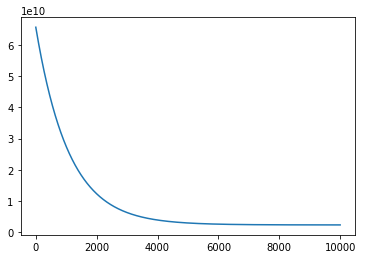

In [ ]:
raise NotImplementedError("Implement new add_column(), predict(), loss(), loss_gradient() here for multivariate regression")


theta_init = np.zeros((3, 1))
result = run_gd(loss, loss_gradient, X, y, theta_init, n_iter=10000, lr=1e-10)
theta_est, loss_values, theta_values = result
plt.plot(loss_values)
plt.show()

# raise NotImplementedError("Put your multivariate regression code here")

**3.2** **[20pt]** Draw a histogam of values for the first and second feature. Why is feature normalization important? Normalize features and re-run the gradient decent. Compare loss plots that you get with and without feature normalization.

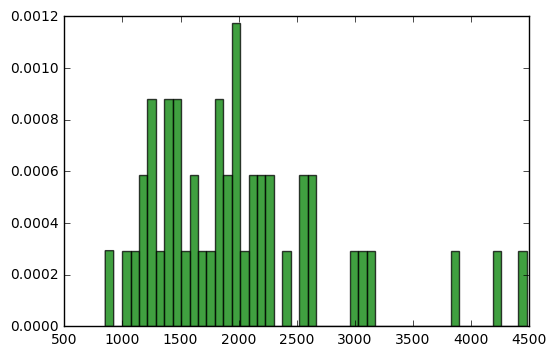

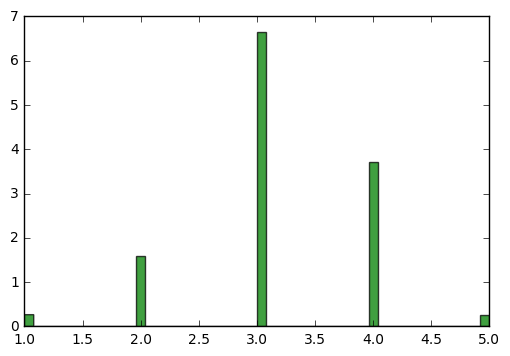

In [ ]:
raise NotImplementedError("Draw histogram for values of feature 1")
plt.show()

raise NotImplementedError("Draw histogram for values of feature 2")
plt.show()

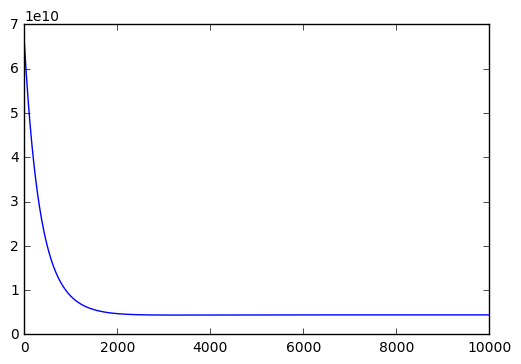

In [ ]:
theta_init = np.zeros((3, 1))
X_normed = np.zeros_like(X)
raise NotImplementedError("Run gd on normalized versions of feature vectors")
result = run_gd(loss, loss_gradient, X_normed, y, theta_init, n_iter=10000, lr=1e-3)
theta_est, loss_values, theta_values = result

plt.plot(loss_values)
plt.show()

**3.3 [10pt]** How can we choose an appropriate learning rate? See what will happen if the learning rate is too small or too large for normalized and not normalized cases?

In [ ]:
raise NotImplementedError("Plot loss behaviour when with multiple different learning rates")

### 4. Written Questions

These problems are extremely important preparation for the exam. Submit solutions to each problem by filling the markdown cells below.

**4.1 [10 pt]** Maximum Likelihood Estimate for Coin Toss

The probability distribution of a single binary variable  that takes value  with probability  is given by the Bernoulli distribution

$$ \operatorname{Bern}(x|\mu) = \mu^x (1-\mu)^{1-x}$$

For example, we can use it to model the probability of seeing ‘heads’ ($x=1$) or ‘tails’ ($x=0$) after tossing a coin, with $\mu$ being the probability of seeing ‘heads’. Suppose we have a dataset of independent coin flips $D = \{ x^{(1)} , \dots, x^{(m)} \}$ and we would like to estimate $\mu$ using Maximum Likelihood. Recall that we can write down the likelihood function as

$$\mathcal L (x^{(i)}|\mu) = \mu^{x^{(i)}} (1-\mu)^{1-{x^{(i)}}}$$

$$ P(D|\mu) = \prod_i \mathcal L (x^{(i)}|\mu)$$

The log of the likelihood function is

$$ \ln P(D|\mu) = \sum_i x^{(i)} \ln \mu + (1-x^{(i)})\ln(1-\mu)$$

Show that the ML solution for $\mu$ is given by  $\mu_{ML} = \frac{h}{m}$  where $h$ is the total number of ‘heads’ in the dataset. Show all of your steps.

**[Click here to insert your solution]**

**4.2 [10 pt]** Localized linear regression

Suppose we want to estimate localized linear regression by weighting the contribution of the data points by their distance to the query point $x_q$, i.e. using the cost

$$ E(x_q) = \frac{1}{2}\sum_i^m \frac{(y^{(i)}-h(x^{(i)}|\theta))^2}{|| x^{(i)} - x_q ||^2}$$

where $\frac{1}{|| x^{(i)} - x_q ||} = w^{(i)}$ is the inverse Euclidean distance between the training point $x^{(i)}$ and query (test) point $x_q$.

Derive the modified normal equations for the above cost function $E(x_q)$. Hint: first, re-write the cost function in matrix/vector notation, using a diagonal matrix to represent the weights $w^{(i)}$.

**[Click here to insert your solution]**

**4.3 [10 pt]** Betting on Trick Coins

A game is played with three coins in a jar: one is a normal coin, one has “heads” on both sides, one has “tails” on both sides. All coins are “fair”, i.e. have equal probability of landing on either side. Suppose one coin is picked randomly from the jar and tossed, and lands with “heads” on top. What is the probability that the bottom side is also “heads”? Show all your steps.

**[Click here to insert your solution]**